# Exploratory Data Analysis

In [0]:
# load libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# local urls
uom_space_url = '../project-data/uom-space.xlsx'
rm_category_type_url = '../project-data/rm-category-type-cleaned.xlsx'
em_location_url = '../project-data/em-location.xlsx'
av_equipment_url = '../project-data/av-equipment.xlsx'
timetable_2020_url = '../project-data/2020-timetable-v2.xlsx'

# drive urls
uom_space_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/uom-space.xlsx'
rm_category_type_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/rm-category-type-cleaned.xlsx'
em_location_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/em-location.xlsx'
av_equipment_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/av-equipment.xlsx'
timetable_2020_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/2020-timetable-v2.xlsx'

In [0]:
uom_space_df = pd.read_excel(uom_space_url)

In [0]:
rm_category_type_df = pd.read_excel(rm_category_type_url)

In [0]:
em_location_df = pd.read_excel(em_location_url)

In [0]:
av_equipment_df = pd.read_excel(av_equipment_url)

In [0]:
timetable_df = pd.read_excel(timetable_2020_url)

In [13]:
# data shapes
print("UOM space shape:"+str(uom_space_df.shape))
print("RM category:"+str(rm_category_type_df.shape))
print("EM location:"+str(em_location_df.shape))
print("AV equipment:"+str(av_equipment_df.shape))
print("2020 timetable:"+str(timetable_df.shape))

UOM space shape:(22166, 14)
RM category:(209, 5)
EM location:(7709, 4)
AV equipment:(1964, 11)
2020 timetable:(131857, 23)


## Space Data Analysis

#### Statistics

In [200]:
uom_space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22166 entries, 0 to 22165
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campus Code             22166 non-null  object 
 1   Building Code           22166 non-null  object 
 2   Building Name           22166 non-null  object 
 3   Floor Code              22166 non-null  object 
 4   Room Code               22166 non-null  object 
 5   Room Name               1791 non-null   object 
 6   Room Category           22166 non-null  int64  
 7   Room Type               22166 non-null  int64  
 8   Room Type Abbreviation  22166 non-null  object 
 9   Room Capacity           20412 non-null  float64
 10  Room Area m²            22166 non-null  float64
 11  Room Condition 2018     18543 non-null  object 
 12  Department Code         22166 non-null  object 
 13  Room Location Code      22166 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [14]:
uom_space_df.head()

,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code
0,PAR,101,BEAUREPAIRE CENTRE,0,CG01,NaN,6,631,Circ-Department,0.0,80.62,NaN,8490,PAR;101;0;CG01
1,PAR,101,BEAUREPAIRE CENTRE,0,CG02,NaN,8,805,Circulation,0.0,12.00,NaN,UNIGEN,PAR;101;0;CG02
2,PAR,101,BEAUREPAIRE CENTRE,0,CG03,NaN,6,631,Circ-Department,0.0,14.12,NaN,8490,PAR;101;0;CG03
3,PAR,101,BEAUREPAIRE CENTRE,0,CG04,NaN,8,805,Circulation,0.0,11.01,NaN,UNIGEN,PAR;101;0;CG04
4,PAR,101,BEAUREPAIRE CENTRE,0,G02,NaN,6,623,Waiting/Foyer,0.0,57.35,NaN,8490,PAR;101;0;G02


In [112]:
# data stats
stats_uom_space = {
    'Stats':['Campuses','Buildings','Floor Codes','Total Rooms','Rooms Types','Room Categories','Room Condition','Departments'],
    'Count':[
             len(uom_space_df.groupby('Campus Code')),
             len(uom_space_df.groupby('Building Code')),
             len(uom_space_df.groupby('Floor Code')),
             len(uom_space_df.groupby('Room Code')),
             len(uom_space_df.groupby('Room Type')),
             len(uom_space_df.groupby('Room Category')),
             len(uom_space_df.groupby('Room Condition 2018')),
             len(uom_space_df.groupby('Department Code'))
    ]
}
stats = pd.DataFrame(data=stats_uom_space)
stats

,Stats,Count
0,Campuses,7
1,Buildings,331
2,Floor Codes,28
3,Total Rooms,5703
4,Rooms Types,185
5,Room Categories,8
6,Room Condition,6
7,Departments,122


#### How many buildings data provided per campus?

In [84]:
gdf1 = uom_space_df.groupby(by='Campus Code', as_index=False).agg({'Building Code': pd.Series.nunique})
gdf1.sort_values(by=['Building Code'], inplace=True)
gdf1

,Campus Code,Building Code
4,SPT,9
6,WER,19
5,STH,20
1,CRE,32
0,BUR,51
2,DOO,70
3,PAR,130


#### How many rooms data provided per campus?

In [83]:
gdf2 = uom_space_df.groupby(by='Campus Code', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)
gdf2

,Campus Code,Room Code
1,CRE,164
0,BUR,173
4,SPT,181
2,DOO,197
6,WER,662
5,STH,769
3,PAR,5006


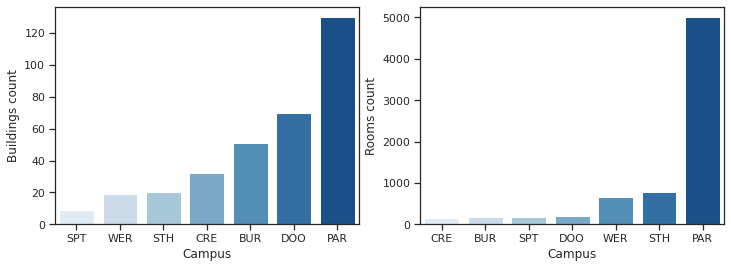

In [92]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)
ax1 = sns.barplot(x="Campus Code", y='Building Code', data=gdf1, ax=ax[0],palette="Blues");
ax1.set(xlabel='Campus', ylabel='Buildings count')
ax2 = sns.barplot(x="Campus Code", y='Room Code', data=gdf2, ax=ax[1],palette="Blues");
ax2.set(xlabel='Campus', ylabel='Rooms count')
plt.show()

### Analysis for parkville campus

In [0]:
uom_space_df_parkville = uom_space_df[uom_space_df['Campus Code']=='PAR']

#### How are rooms distributed across possible floors?

In [0]:
gdf = uom_space_df_parkville.groupby(by='Floor Code', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf.sort_values(by=['Room Code'], inplace=True)

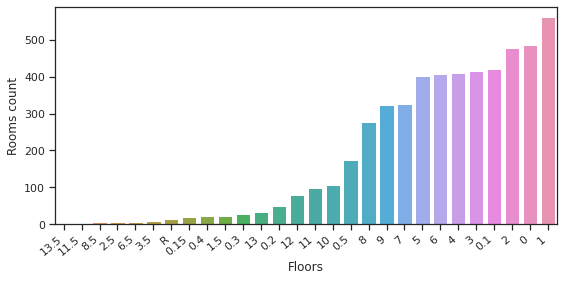

In [68]:
plt.figure(figsize=(9,4))
ax = sns.barplot(x="Floor Code", y='Room Code', data=gdf);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Floors', ylabel='Rooms count')
plt.show()

#### How is the category of rooms distributed?

In [139]:
gdf1 = uom_space_df_parkville.groupby(by='Room Category', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)
gdf1

,Room Category,Room Code
6,7,70
1,2,286
4,5,431
2,3,780
3,4,1102
5,6,1219
0,1,1862
7,8,2104


#### How many room types in each category?

In [140]:
gdf2 = uom_space_df_parkville.groupby(by='Room Category', as_index=False).agg({'Room Type': pd.Series.nunique})
gdf2.sort_values(by=['Room Type'], inplace=True)
gdf2

,Room Category,Room Type
6,7,1
1,2,10
4,5,16
0,1,18
3,4,21
2,3,28
5,6,31
7,8,45


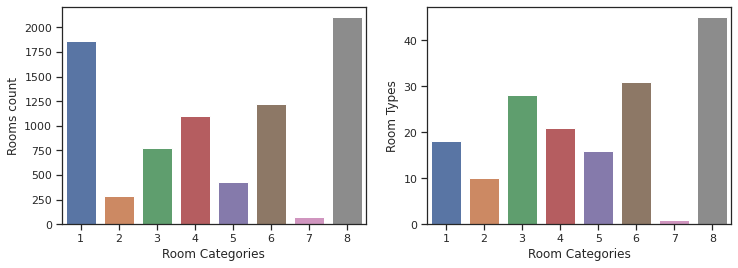

In [143]:
# plot
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)
ax1 = sns.barplot(x="Room Category", y='Room Code', data=gdf1, ax=ax[0]);
ax1.set(xlabel='Room Categories', ylabel='Rooms count')
ax2 = sns.barplot(x="Room Category", y='Room Type', data=gdf2, ax=ax[1]);
ax2.set(xlabel='Room Categories', ylabel='Room Types')
plt.show()

#### How is room capacity and Room Area $m^2$ distributed in data?

In [0]:
gdf1 = uom_space_df_parkville.groupby(by=['Room Type','Room Category'], as_index=False)['Room Capacity'].sum()
gdf1.sort_values(by=['Room Capacity'], inplace=True)

In [218]:
len(gdf1[gdf1['Room Capacity']==0])

33

In [0]:
gdf2 = uom_space_df_parkville.groupby(by=['Room Type','Room Category'], as_index=False)['Room Area m²'].sum()
gdf2.sort_values(by=['Room Area m²'], inplace=True)

In [217]:
len(gdf2[gdf2['Room Area m²']==0.0])

0

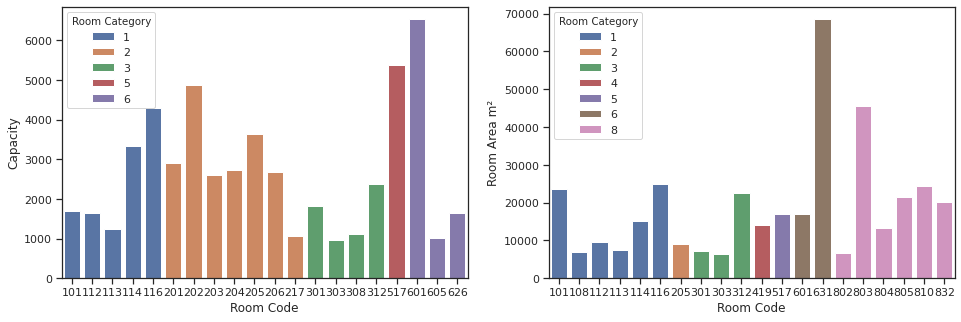

In [210]:
# top 30 rooms
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(16)
ax1 = sns.barplot(x="Room Type", y='Room Capacity', hue="Room Category", data=gdf1.tail(20), dodge=False, ax=ax[0]);
ax1.set(xlabel='Room Code', ylabel='Capacity')
ax2 = sns.barplot(x="Room Type", y='Room Area m²', hue="Room Category", data=gdf2.tail(20), dodge=False, ax=ax[1]);
ax2.set(xlabel='Room Code', ylabel='Room Area m²')
plt.show()

#### How is room condition distributed across different rooms?

In [0]:
gdf = uom_space_df_parkville.groupby(by=['Room Condition 2018','Room Category'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1 = gdf.loc[(gdf['Room Condition 2018'] == 'Excellent')|(gdf['Room Condition 2018'] == 'Very Good')|(gdf['Room Condition 2018'] == 'Good')]
gdf2 = gdf.loc[(gdf['Room Condition 2018'] == 'Fair')|(gdf['Room Condition 2018'] == 'Poor')]

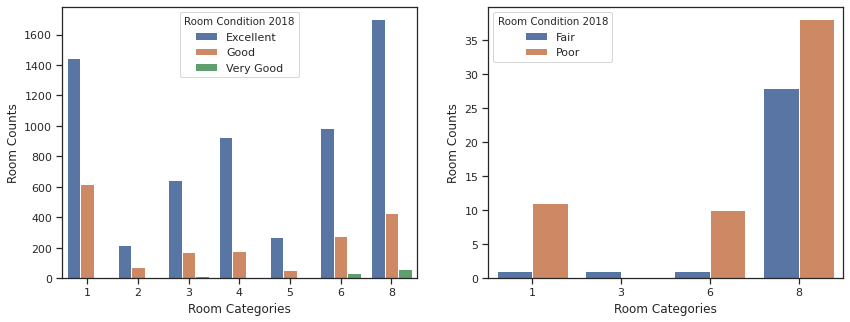

In [199]:
# plot
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(14)
ax1 = sns.barplot(x="Room Category", y='Room Code', hue="Room Condition 2018", data=gdf1, dodge=True,ax=ax[0])
ax1.set(xlabel='Room Categories', ylabel='Room Counts')
ax2 = sns.barplot(x="Room Category", y='Room Code', hue="Room Condition 2018", data=gdf2, dodge=True,ax=ax[1])
ax2.set(xlabel='Room Categories', ylabel='Room Counts')
plt.show()

#### How are departments distributed across rooms and categories?

In [227]:
gdf1 = uom_space_df_parkville.groupby(by=['Department Code'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)
gdf1.tail(10)

,Department Code,Room Code
11,2540,260
15,3000,267
58,6100,268
99,FCA,292
28,4600,312
63,6300,355
67,7320,404
81,9730,578
84,9770,680
111,UNIGEN,1938


In [228]:
gdf2 = uom_space_df_parkville.groupby(by=['Room Category'], as_index=False).agg({'Department Code': pd.Series.nunique})
gdf2.sort_values(by=['Department Code'], inplace=True)
gdf2.tail(10)

,Room Category,Department Code
6,7,1
7,8,20
1,2,27
4,5,30
2,3,53
3,4,88
5,6,89
0,1,90


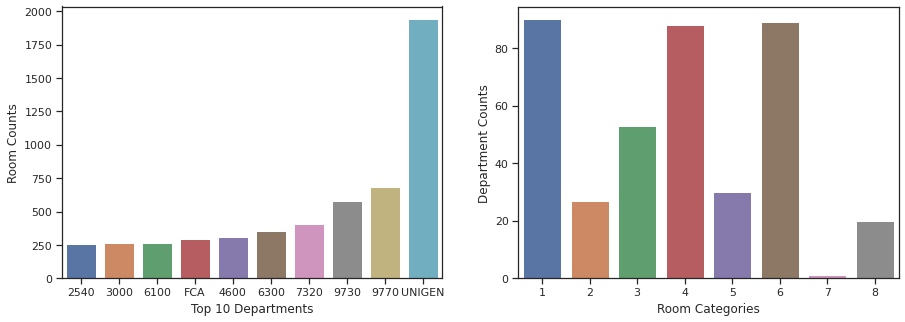

In [234]:
# plot
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Department Code", y='Room Code', data=gdf1.tail(10),dodge=False,ax=ax[0])
ax1.set(xlabel='Top 10 Departments', ylabel='Room Counts')
ax2 = sns.barplot(x="Room Category", y='Department Code',data=gdf2, dodge=True,ax=ax[1])
ax2.set(xlabel='Room Categories', ylabel='Department Counts')
plt.show()

### Room Categories Data Analysis

In [122]:
rm_category_type_df.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
0,1,100,Office - Other,Office - Other ...,"To be used, as the last resort, for any ""Offic..."
1,1,101,Office Academic,Office - Academic Staff ...,A room with office furniture which provides ac...
2,1,102,Office Research,Office - Research Staff ...,A room with office furniture which provides ac...
3,1,103,Office Grad Res,Office - Graduate Researcher ...,A room with office furniture which provides ac...
4,1,104,Off-Tech,Office - Technical/Laboratory/Store Staff ...,A room with office furniture which provides ac...


In [118]:
rm_category_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Room Category           209 non-null    object
 1   Room Type               209 non-null    object
 2   Room Type Abbreviation  209 non-null    object
 3   Description             209 non-null    object
 4   Room Type Definition    209 non-null    object
dtypes: object(5)
memory usage: 8.3+ KB


In [124]:
# data stats
stats_rm_category = {
    'Stats':['Room Categories','Room Types'],
    'Count':[
             len(rm_category_type_df.groupby('Room Category')),
             len(rm_category_type_df.groupby('Room Type'))
    ]
}
stats = pd.DataFrame(data=stats_rm_category)
stats

,Stats,Count
0,Room Categories,10
1,Room Types,209


In [0]:
# clean data for joining
rm_category_type_df['Room Type']=rm_category_type_df['Room Type'].str.strip()
rm_category_type_df['Room Category']=rm_category_type_df['Room Category'].str.strip()
rm_category_type_df['Room Type Definition']=rm_category_type_df['Room Type Definition'].str.lower().str.strip()

rm_category_type_df.info()

In [136]:
# search for rooms with keyword - toilet
rm_category_type_df[rm_category_type_df['Room Type Definition'].str.contains("toilet|washroom")]

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
148,7,708,Stud. Ablutions,Stud Accom-Ablutions ...,"a room containing shower, bath or toilet facil..."
171,8,818,WC Acc. Unisex,Toilet - Unisex Accessible ...,includes accessible toilets in all buildings o...
173,8,820,WC Female,Toilet - Female ...,includes female toilets in all buildings other...
174,8,821,WC Male,Toilet - Male ...,includes male toilets in all buildings other t...
175,8,822,WC Unisex,Toilet - Unisex ...,includes unisex toilets in all buildings other...
176,8,823,WC Ambulant F,Toilet - Female Ambulant ...,includes a female ambulatory toilet
177,8,824,WC Ambulant M,Toilet - Male Ambulant ...,includes a male ambulatory toilet
178,8,825,WC Acc Uni/Baby,Toilet/Baby Change - Unisex Accessible ...,inculdes unisex accessible toilet and baby cha...
180,8,827,Shwr/WC Unisex,Toilet/Shower - Unisex ...,includes both toilet/s and shower. either unis...
181,8,828,Shwr/WC Female,Toilet/Shower - Female ...,includes both toilets and shower/s - female. d...


In [137]:
# search for rooms with keyword - meeting
rm_category_type_df[rm_category_type_df['Room Type Definition'].str.contains("meeting|workspace")]

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
9,1,111,SharedUndefined,Shared Workspace - Not Defined ...,a shared workspace area (ufa m²) not included...
13,1,115,Shared Tech/Lab,Shared Workspace - Technical/Laboratory/Store ...,a shared workspace area which provides accommo...
14,1,116,Shared ProStaff,Shared Workspace- Professional Staff ...,a shared workspace area which provides accommo...
17,1,119,Informal Work,Informal Work Space ...,an informal area not being defined as an offic...
18,1,120,Focus Room,Focus Room ...,non-bookable office in shared workspace used f...
107,6,601,Conf / Meeting,Meeting/Board/Conference Room ...,a room specifically set aside for holding meet...
108,6,602,Conf. Service,Meeting/Board/Conference Service Room ...,"a room which provides service to meetings, com..."
125,6,619,Prayer Area,Religious/Prayer Facility ...,a room or area set aside for religious meeting...
132,6,626,Multi-Function,Multi-Function Space ...,a room whose set up can be changed readily (eg...
135,6,629,Open Meeting,Open Plan Meeting Space ...,a meeting space situated in an open plan area ...
